问题：Ω；断点

In [8]:
from refractor_funcs import read_nc_details,get_data
import numpy as np
import plotly.graph_objs as go

In [9]:
# file_path = '../data/2014/15s1/dms_20140401_15s1.001.nc'
file_path = r"G:\0_postgraduate\DMSP\data\2011\15s1\dms_20110101_15s1.001.nc"
data_details = read_nc_details(file_path)
data = get_data(file_path,data_details.keys())

# # 数据加载
# latitude = data['gdlat']
# longitude = data['glon']
# altitude = data['gdalt']  # 高度数据（公里）
# # 磁场数据（T转nT）
# diff_bt = np.sqrt(data['diff_b_for']**2 + data['diff_b_perp']**2 + data['diff_bd']**2) *1e9
# # 使用 ffill 和 bfill(向前填充和向后填充)
# diff_bt_ff_bf = diff_bt.fillna(method='ffill').fillna(method='bfill').to_numpy()

# 少一点数据试试
latitude = data['gdlat'][:10000]
longitude = data['glon'][:10000]
altitude = data['gdalt'][:10000]  # 高度数据（公里）
# 磁场数据（T转nT）
diff_bt = np.sqrt(data['diff_b_for']**2 + data['diff_b_perp']**2 + data['diff_bd']**2) *1e9
diff_bt = diff_bt[:5000]
# 使用 ffill 和 bfill(向前填充和向后填充)
diff_bt_ff_bf = diff_bt.fillna(method='ffill').fillna(method='bfill').to_numpy()

(<Axes: >, <Axes: >, <Axes: >)

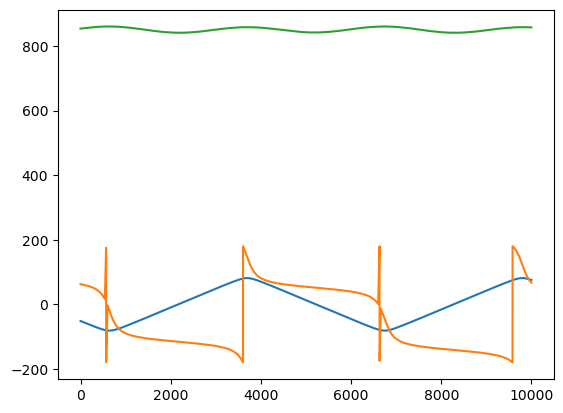

In [10]:
latitude.plot(),longitude.plot(),altitude.plot()

In [11]:
earth_radius = 6371  # km

# Satellite coordinates
x = (earth_radius + altitude) * np.cos(np.radians(latitude)) * np.cos(np.radians(longitude))
y = (earth_radius + altitude) * np.cos(np.radians(latitude)) * np.sin(np.radians(longitude))
z = (earth_radius + altitude) * np.sin(np.radians(latitude))

<Axes: >

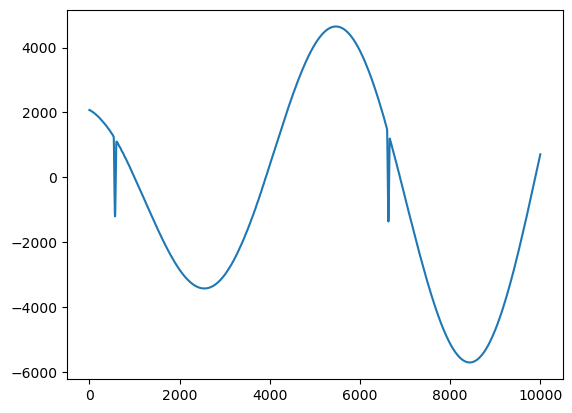

In [12]:
x.plot()

<Axes: >

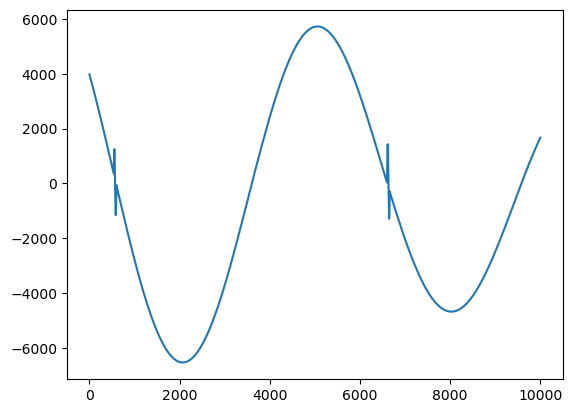

In [13]:
y.plot()

<Axes: >

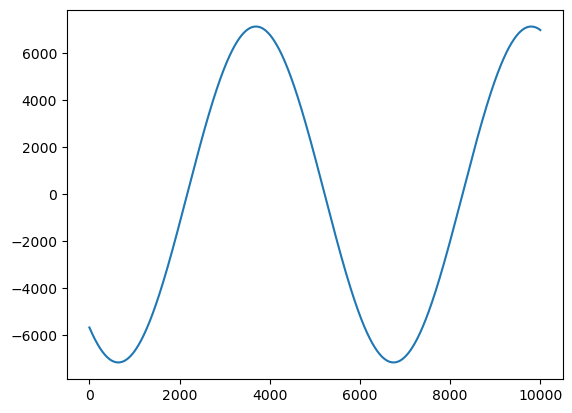

In [14]:
z.plot()

In [12]:

# 检测并处理经度(180,-180)附近的突变点
threshold = 180  # 设置一个阈值来检测突变点
segments = []
longitudes = []
start = 0
num_data = len(latitude)
for i in range(1, num_data):
    # 检测经度突变
    if np.abs(longitude[i] - longitude[i - 1]) > threshold:
        # 存储当前段的数据
        segments.append((x[start:i], y[start:i], z[start:i]))
        # lon
        longitudes.append(longitude[start:i])
        start = i  # 更新下一段的起点

# 添加最后一段
segments.append((x[start:], y[start:], z[start:]))

longitudes.append(longitude[start:])

In [13]:
np.radians(-180)

-3.141592653589793

<Axes: >

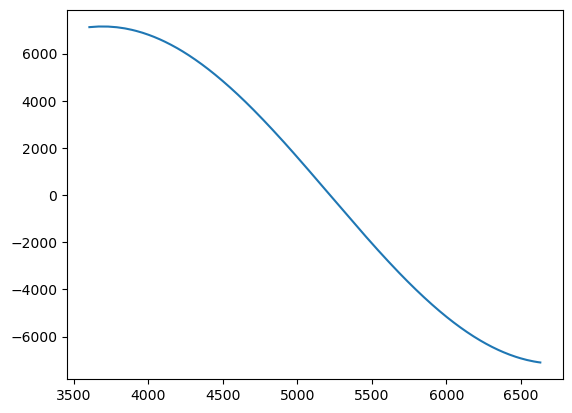

In [14]:
segments[2][2].plot()

<Axes: >

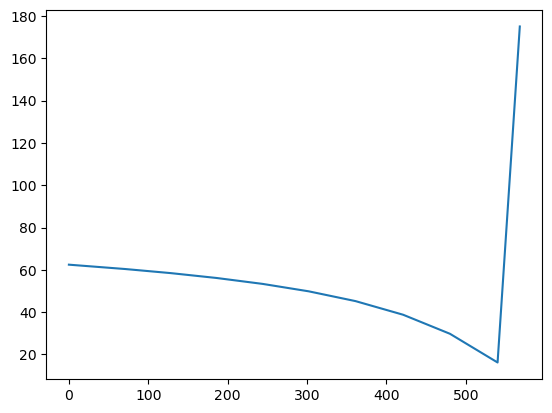

In [15]:
longitudes[0].plot()

<Axes: >

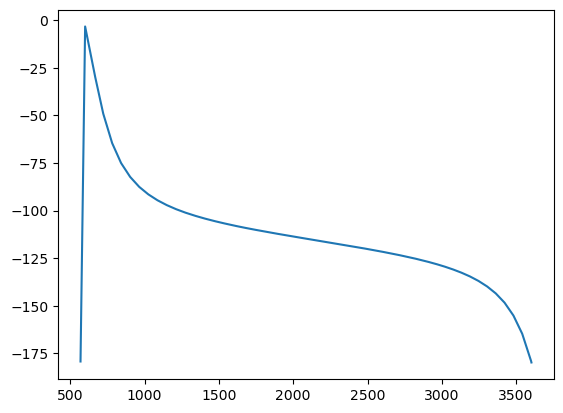

In [16]:
longitudes[1].plot()

<Axes: >

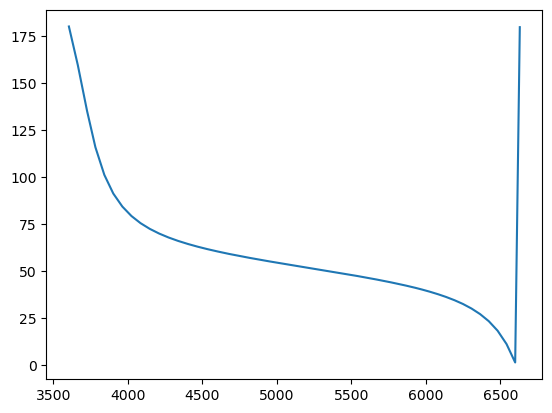

In [17]:
longitudes[2].plot()

<Axes: >

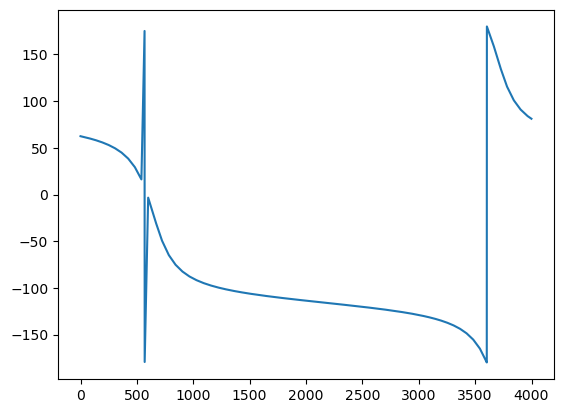

In [18]:
data['glon'][:4000].plot()

In [19]:
# 创建图像
fig = go.Figure()

# 添加地球表面
fig.add_trace(go.Surface(
    x=earth_radius * np.outer(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
    y=earth_radius * np.outer(np.sin(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
    z=earth_radius * np.outer(np.ones(100), np.cos(np.linspace(0, np.pi, 100))),
    colorscale='Earth',
    opacity=0.6,
    name='Earth',
    hoverinfo='skip'  # 不显示地球模型的悬浮信息
))

# 添加卫星轨迹段
for segment in segments:
    fig.add_trace(go.Scatter3d(
        x=segment[0], y=segment[1], z=segment[2],
        mode='lines',
        name='Satellite Trajectory',
        line=dict(width=2, color='blue'),
        hoverinfo='x+y+z'  # 鼠标悬浮显示 x, y, z 坐标
    ))

# 设置图像布局
fig.update_layout(
    title='3D Satellite Trajectory around Earth',
    showlegend=False,
    scene=dict(
        xaxis_title='X (km)',
        yaxis_title='Y (km)',
        zaxis_title='Z (km)'
    )
)

# 显示图像
fig.show()

<Axes: >

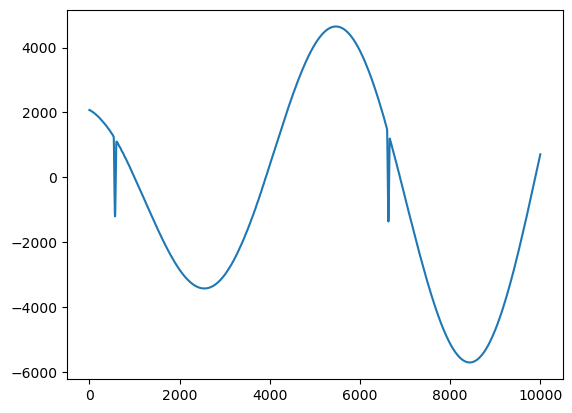

In [20]:
x.plot()

<Axes: >

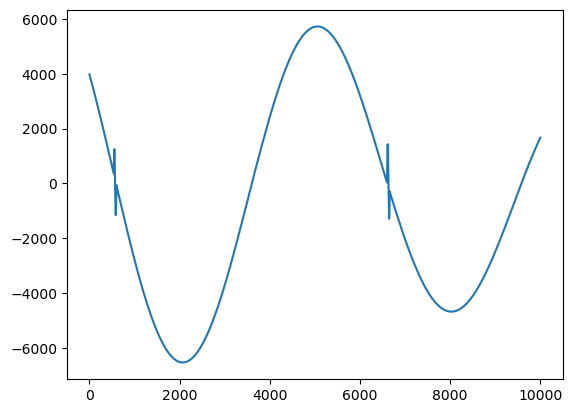

In [21]:
y.plot()

<Axes: >

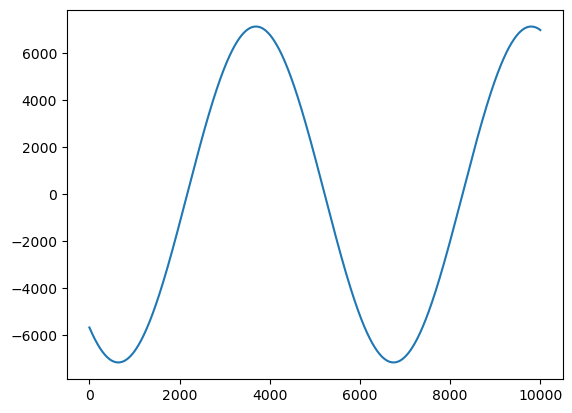

In [22]:
z.plot()

In [ ]:
# # -*- coding: utf-8 -*-
# # @Author  : cleo
# # @Software: PyCharm
# 
# from code_back import read_nc_details,get_data
# import numpy as np
# import plotly.graph_objs as go
# 
# # file_path = '../data/2014/15s1/dms_20140401_15s1.001.nc'
# file_path = r"G:\0_postgraduate\DMSP\data\2011\15s1\dms_20110101_15s1.001.nc"
# data_details = read_nc_details(file_path)
# data = get_data(file_path,data_details.keys())
# 
# # # 数据加载
# # latitude = data['gdlat']
# # longitude = data['glon']
# # altitude = data['gdalt']  # 高度数据（公里）
# # # 磁场数据（T转nT）
# # diff_bt = np.sqrt(data['diff_b_for']**2 + data['diff_b_perp']**2 + data['diff_bd']**2) *1e9
# # # 使用 ffill 和 bfill(向前填充和向后填充)
# # diff_bt_ff_bf = diff_bt.fillna(method='ffill').fillna(method='bfill').to_numpy()
# 
# # 少一点数据试试
# latitude = data['gdlat'][:5000]
# longitude = data['glon'][:5000]
# altitude = data['gdalt'][:5000]  # 高度数据（公里）
# # 磁场数据（T转nT）
# diff_bt = np.sqrt(data['diff_b_for']**2 + data['diff_b_perp']**2 + data['diff_bd']**2) *1e9
# diff_bt = diff_bt[:5000]
# # 使用 ffill 和 bfill(向前填充和向后填充)
# diff_bt_ff_bf = diff_bt.fillna(method='ffill').fillna(method='bfill').to_numpy()
# 
# earth_radius = 6371  # km
# 
# # Satellite coordinates
# x = (earth_radius + altitude) * np.cos(np.radians(latitude)) * np.cos(np.radians(longitude))
# y = (earth_radius + altitude) * np.cos(np.radians(latitude)) * np.sin(np.radians(longitude))
# z = (earth_radius + altitude) * np.sin(np.radians(latitude))
# 
# # 检测并处理经度(180,-180)附近的突变点
# threshold = 180  # 设置一个阈值来检测突变点
# segments = []
# start = 0
# num_data = len(latitude)
# for i in range(1, num_data):
#     # 检测经度突变
#     if np.abs(longitude[i] - longitude[i - 1]) > threshold:
#         # 存储当前段的数据
#         segments.append((x[start:i], y[start:i], z[start:i]))
#         start = i  # 更新下一段的起点
# 
# # 添加最后一段
# segments.append((x[start:], y[start:], z[start:]))
# 
# # 创建图像
# fig = go.Figure()
# 
# # 添加地球表面
# fig.add_trace(go.Surface(
#     x=earth_radius * np.outer(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
#     y=earth_radius * np.outer(np.sin(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
#     z=earth_radius * np.outer(np.ones(100), np.cos(np.linspace(0, np.pi, 100))),
#     colorscale='Earth',
#     opacity=0.6,
#     name='Earth',
#     hoverinfo='skip'  # 不显示地球模型的悬浮信息
# ))
# 
# # 添加卫星轨迹段
# for segment in segments:
#     fig.add_trace(go.Scatter3d(
#         x=segment[0], y=segment[1], z=segment[2],
#         mode='lines',
#         name='Satellite Trajectory',
#         line=dict(width=2, color='blue'),
#         hoverinfo='x+y+z'  # 鼠标悬浮显示 x, y, z 坐标
#     ))
# 
# # 设置图像布局
# fig.update_layout(
#     title='3D Satellite Trajectory around Earth',
#     showlegend=False,
#     scene=dict(
#         xaxis_title='X (km)',
#         yaxis_title='Y (km)',
#         zaxis_title='Z (km)'
#     )
# )
# 
# # 显示图像
# fig.show()